In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [12]:
plt.rcParams.update({'font.size': 22,
                    'xtick.major.size': 10,
                    'xtick.major.width': 3,
                    'ytick.major.size': 10,
                    'ytick.major.width': 3,
                    'axes.linewidth': 2.5,
                    'axes.edgecolor': 'black',})

In [42]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data/program_data/us_program_data.csv'))

# Group by iso/rto and calculate the necessary statistics
iso_rto_durations = data.groupby(['iso/rto'])[['min_dur', 'max_dur']].mean().reset_index()

# make any nan min duration 0 and and nan max duration 24
iso_rto_durations['min_dur'] = iso_rto_durations['min_dur'].fillna(5/60)
iso_rto_durations['max_dur'] = iso_rto_durations['max_dur'].fillna(6.28)

# Create a new column for the duration height
iso_rto_durations['dur_height'] = iso_rto_durations['max_dur'] - iso_rto_durations['min_dur']

# replace row iso/rto name other with Other
iso_rto_durations['iso/rto'] = iso_rto_durations['iso/rto'].replace('other', 'Other')


In [46]:
region_order = ["ERCOT", "CAISO", "ISONE", "NYISO", "PJM", "MISO", "SPP", "Other"]

# reorder rows to make sure the order is correct
iso_rto_durations['iso/rto'] = pd.Categorical(iso_rto_durations['iso/rto'], categories=region_order, ordered=True)
# Sort the DataFrame by the 'iso/rto' column
iso_rto_durations = iso_rto_durations.sort_values('iso/rto')
iso_rto_durations.reset_index(drop=True, inplace=True)
iso_rto_durations

,iso/rto,min_dur,max_dur,dur_height
0,ERCOT,0.083333,4.000000,3.916667
1,CAISO,1.076923,4.588235,3.511312
2,ISONE,2.857143,4.428571,1.571429
3,NYISO,4.000000,6.280000,2.280000
4,PJM,3.750000,6.285714,2.535714
5,MISO,4.000000,4.750000,0.750000
6,SPP,3.500000,6.222222,2.722222
7,Other,3.222222,6.250000,3.027778


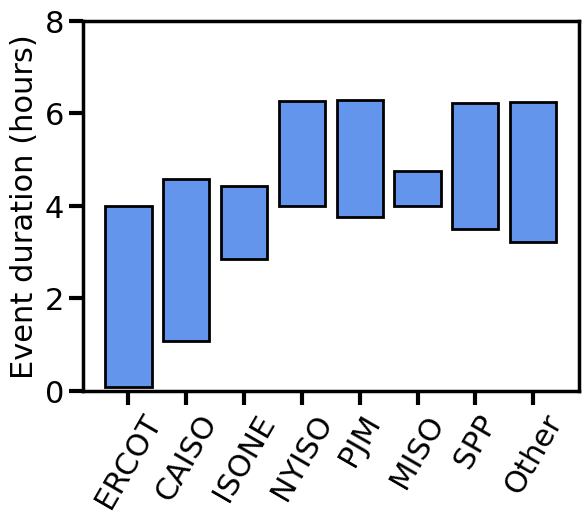

In [50]:

# create a bar chart for the min and max duration
fig, ax = plt.subplots()

ax.bar(iso_rto_durations['iso/rto'], 
        iso_rto_durations['dur_height'], 
        bottom=iso_rto_durations['min_dur'], 
        color='cornflowerblue', 
        edgecolor='black', 
        linewidth=2)

ax.set_ylabel('Event duration (hours)')
# rotate the x-axis labels
plt.xticks(rotation=60, ha='center')
ax.set_yticks(np.arange(0, 9, 2))

# Event Duration by ISO/RTO

  iso/rto   min_dur    max_dur
0   CAISO  1.076923   4.588235
1   ERCOT  0.000000   4.000000
2   ISONE  2.857143   4.428571
3    MISO  4.000000   4.750000
4   NYISO  4.000000  24.000000
5     PJM  3.750000   6.285714
6     SPP  3.500000   6.222222
7   other  3.222222   6.250000
Index(['iso/rto', 'season', 'duration_type', 'duration'], dtype='object')


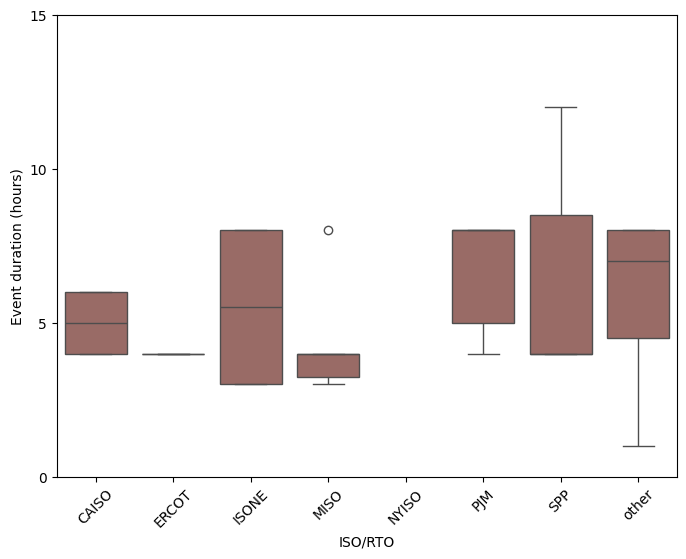

In [ ]:

data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), 'data/program_data/us_program_data.csv'))

# Group by iso/rto and calculate the necessary statistics
iso_rto_durations = data.groupby(['iso/rto'])[['min_dur', 'max_dur']].mean().reset_index()



# Display the iso/rto DataFrame
print(iso_rto_durations)

# Calculate the minimum and maximum durations per season for each iso/rto
durations = data.groupby(['iso/rto', 'season'])['max_dur'].agg(['min', 'max']).reset_index()

# Melt the DataFrame to long format for seaborn
durations_melted = durations.melt(id_vars=['iso/rto', 'season'], value_vars=['min', 'max'], var_name='duration_type', value_name='duration')

# replace the season such that the first letter is capitalized and replace _ with space
durations_melted['season'] = durations_melted['season'].str.capitalize().str.replace('_', ' ')

print(durations_melted.columns)
# for any rows with a nan max_dur, replace it with 24 hours

# Plot a box and whisker plot of the durations by iso/rto
fig, ax = plt.subplots(figsize=(8, 6))

my_palette = {'Summer': '#A1645E', 'Winter': '#5E9BA1', 'Year round': '#747474'}
sns.boxplot(x='iso/rto', y='duration', data=durations_melted, ax=ax, color=my_palette['Summer'])

# Update axis labels and ticks
ax.set(xlabel='ISO/RTO', ylabel='Event duration (hours)', yticks=np.arange(0, 17, 5))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [3]:
# Inspect NYISO data
nyiso_data = data[data['iso/rto'] == 'NYISO']
print("NYISO Data:")
print(nyiso_data)

# Check for missing or identical min/max durations
if nyiso_data['max_dur'].isna().any():
    print("Missing max_dur values for NYISO.")
if (nyiso_data['min_dur'] == nyiso_data['max_dur']).all():
    print("min_dur and max_dur are identical for NYISO.")

NYISO Data:
                                              program  \
82  Distribution Load Relief Program (Contingency)...   
83  Distribution Load Relief Program (Immediate) (...   

                                         program_link program_rate state  \
82  https://cdne-dcxprod-sitecore.azureedge.net/-/...     program     NY   
83  https://cdne-dcxprod-sitecore.azureedge.net/-/...     program     NY   

   iso/rto     ba       comp  util load        trigger  ... events_daily  \
82   NYISO  NYISO  conEdison  elec   any  non_economic  ...          NaN   
83   NYISO  NYISO  conEdison  elec   any  non_economic  ...          NaN   

   max_consec  max_hours  notif_type notif_time  notif_delt  \
82        NaN        NaN      day_of        NaN         2.0   
83        NaN        NaN      day_of        NaN         0.0   

                                          base_method  hist_pres  \
82  Average of the hourly usage of the top five da...        yes   
83  Average of the hourly usage 